# Null Hypothesis: Budget has no effect on Movie Gross

## Setup

In [1]:
#Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
#Read the csv into a DataFrame
clean_df = pd.read_csv("../output_data/clean_with_currency_language.csv")

In [3]:
#Preview the DataFrame
clean_df.head()

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform,CurrencyBudget,CurrencyGross,Language
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,167885588.0,others,USD,USD,English
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,257212.0,others,NaN,USD,English
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1849718.0,others,NaN,USD,English
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,119942387.0,others,USD,USD,English
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,20657.0,others,NaN,USD,English


In [4]:
#Date format
clean_df["Release"] = clean_df["Release"].astype("datetime64")

In [5]:
print(len(clean_df))
print(clean_df["Title"].nunique())

1153
1153


In [6]:
#Custom scatter plot function
def sp(a,b,c,d,e,f,g):
    #Scatter plot
    plt.figure(figsize=(9,7))
    plt.scatter(a,b,s=60,color="blue",edgecolor="black",alpha=.5)

    #Graph properties
    plt.tick_params(axis="both",which="major",labelsize=14)
    plt.xlabel(c,size=14)
    plt.ylabel(d,size=14)
    plt.title(e,size=20)

    #Regression
    corr = round(a.corr(b),2)
    (slope, intercept, r, p, stderr) = linregress(a,b)
    line = slope*a + intercept
    plt.plot(a,line,"r-")
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(f,g),color="red",size=22)
    print(f"The coefficient of determination is: {r**2}")
    print(f"The correlation is: {corr}")

    #Show plot
    plt.show()

# a = x axis
# b = y axis
# c = x label
# d = y label
# e = plot title
# f = x coord
# g = y coord
# sp(a,b,c,d,e,f,g,h)

## BoxOffice

In [7]:
#BoxOffice definition
box_office = clean_df.loc[(clean_df["CurrencyBudget"]=="USD")&(clean_df["CurrencyGross"]=="USD")]
box_office["ROI"] = box_office["Gross"]/box_office["Budget"]
box_office["Profit"] = box_office["Gross"]-box_office["Budget"]

C:\Users\vinay\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vinay\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
#Subsets pre and post covid
box_office_pre = box_office.loc[box_office["Release"]<"2020-01-01"]
box_office_post = box_office.loc[box_office["Release"]>="2020-01-01"]

#Subsets annual
box_office_2018 = box_office.loc[clean_df["Release"]<"2019-01-01"]
box_office_2019 = box_office.loc[(clean_df["Release"]>="2019-01-01")&
                                 (clean_df["Release"]<"2020-01-01")]
box_office_2020 = box_office.loc[(clean_df["Release"]>="2020-01-01")&
                                 (clean_df["Release"]<"2021-01-01")]
box_office_2021 = box_office.loc[(clean_df["Release"]>="2021-01-01")&
                                 (clean_df["Release"]<"2022-01-01")]
box_office_2022 = box_office.loc[clean_df["Release"]>="2022-01-01"]

### Are Budget, Gross, ROI, and Profit normally distributed?

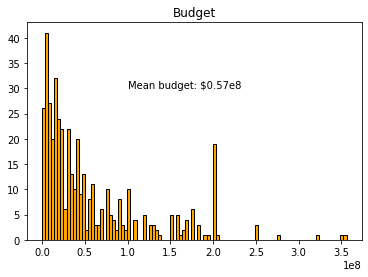

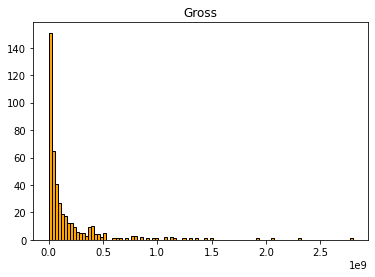

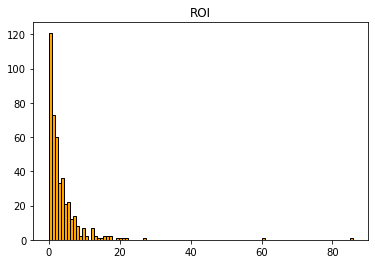

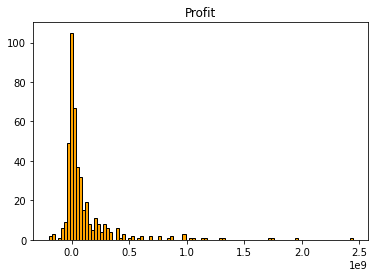

In [9]:
budget_mean = box_office["Budget"].mean()
plt.hist(box_office["Budget"],bins=100,edgecolor="black",color="orange")
plt.title("Budget")
plt.annotate(f"Mean budget: ${round(budget_mean/100000000,2)}e8",(1e8,30))
plt.show()
plt.hist(box_office["Gross"],bins=100,edgecolor="black",color="orange")
plt.title("Gross")
plt.show()
plt.hist(box_office["ROI"],bins=100,edgecolor="black",color="orange")
plt.title("ROI")
plt.show()
plt.hist(box_office["Profit"],bins=100,edgecolor="black",color="orange")
plt.title("Profit")
plt.show()

### What is the strength of the relationship between Budget and Gross?

The coefficient of determination is: 0.5182654254253257
The correlation is: 0.72


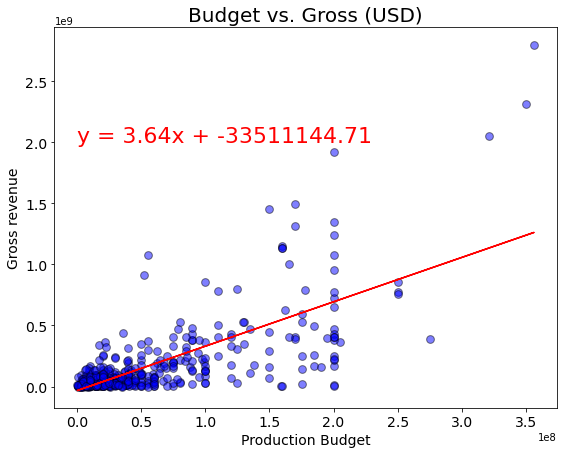

In [10]:
a = box_office["Budget"]
b = box_office["Gross"]
c = "Production Budget"
d = "Gross revenue"
e = "Budget vs. Gross (USD)"
f = 0
g = 2e9
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between Pre covid Budget and Gross?

The coefficient of determination is: 0.6152021575784407
The correlation is: 0.78


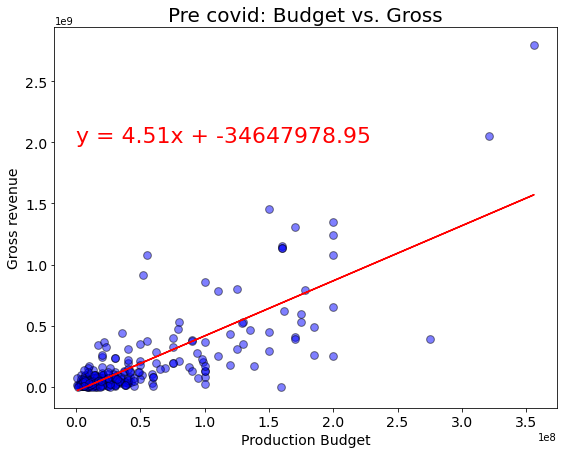

In [11]:
a = box_office_pre["Budget"]
b = box_office_pre["Gross"]
c = "Production Budget"
d = "Gross revenue"
e = "Pre covid: Budget vs. Gross"
f = 0
g = 2e9
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between Post covid Budget and Gross?

The coefficient of determination is: 0.47186554227317984
The correlation is: 0.69


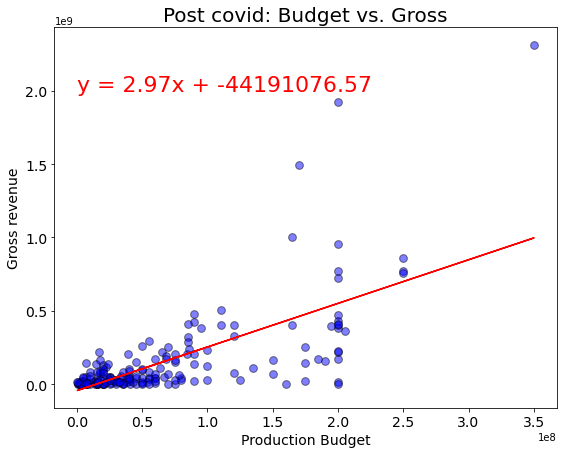

In [12]:
a = box_office_post["Budget"]
b = box_office_post["Gross"]
c = "Production Budget"
d = "Gross revenue"
e = "Post covid: Budget vs. Gross"
f = 0
g = 2e9
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between 2018 Budget and Gross?

The coefficient of determination is: 0.6680539147344517
The correlation is: 0.82


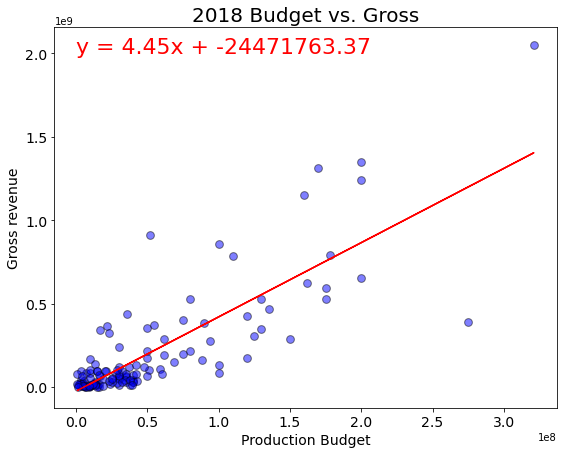

In [13]:
a = box_office_2018["Budget"]
b = box_office_2018["Gross"]
c = "Production Budget"
d = "Gross revenue"
e = "2018 Budget vs. Gross"
f = 0
g = 2e9
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between 2019 Budget and Gross?

The coefficient of determination is: 0.5678867162631183
The correlation is: 0.75


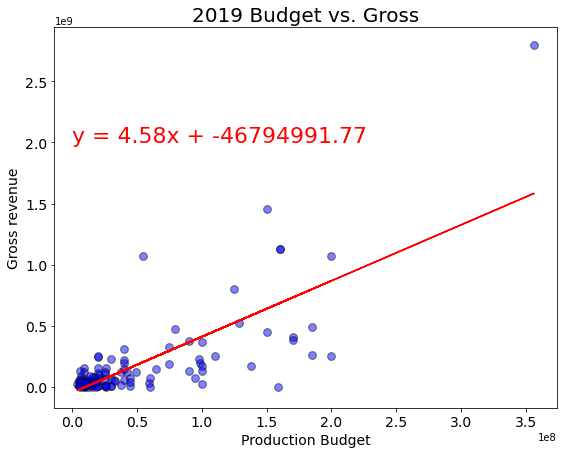

In [14]:
a = box_office_2019["Budget"]
b = box_office_2019["Gross"]
c = "Production Budget"
d = "Gross revenue"
e = "2019 Budget vs. Gross"
f = 0
g = 2e9
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between 2020 Budget and Gross?

The coefficient of determination is: 0.49408361356629626
The correlation is: 0.7


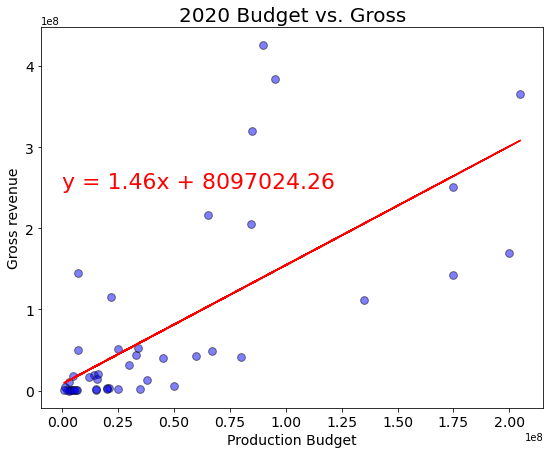

In [15]:
a = box_office_2020["Budget"]
b = box_office_2020["Gross"]
c = "Production Budget"
d = "Gross revenue"
e = "2020 Budget vs. Gross"
f = 0
g = 2.5e8
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between 2021 Budget and Gross?

The coefficient of determination is: 0.3734077852980403
The correlation is: 0.61


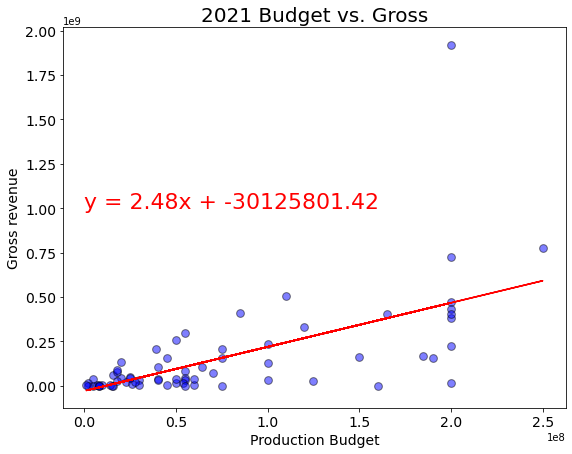

In [16]:
a = box_office_2021["Budget"]
b = box_office_2021["Gross"]
c = "Production Budget"
d = "Gross revenue"
e = "2021 Budget vs. Gross"
f = 0
g = 1e9
sp(a,b,c,d,e,f,g)

### What is the strength of the relationship between 2022 Budget and Gross?

The coefficient of determination is: 0.5783988804547284
The correlation is: 0.76


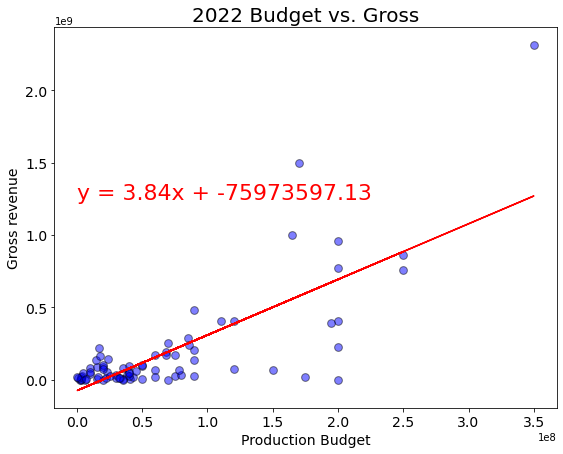

In [17]:
a = box_office_2022["Budget"]
b = box_office_2022["Gross"]
c = "Production Budget"
d = "Gross revenue"
e = "2022 Budget vs. Gross"
f = 0
g = 1.25e9
sp(a,b,c,d,e,f,g)

In [18]:
box_office["Year"] = box_office["Release"].dt.strftime("%Y")

C:\Users\vinay\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


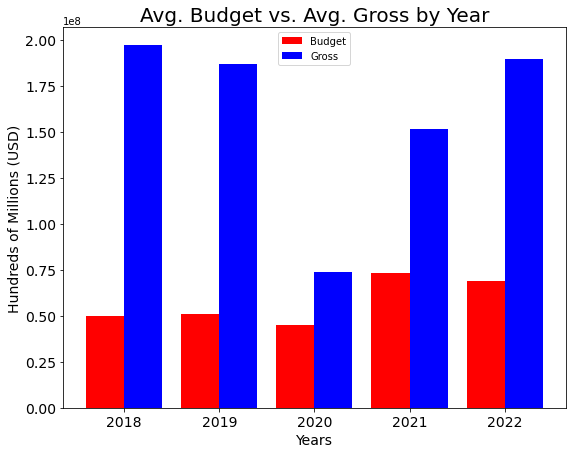

In [19]:
average = box_office.groupby("Year").mean()
x = average["Budget"].index
y1 = average["Budget"]
y2 = average["Gross"]
x_axis = np.arange(len(x))
plt.figure(figsize=(9,7))
plt.bar(x_axis-0.2,y1,0.4,label="Budget",color="r")
plt.bar(x_axis+0.2,y2,0.4,label="Gross",color="b")
plt.tick_params(axis="both",which="major",labelsize=14)
plt.xticks(x_axis,x)
plt.xlabel("Years",size=14)
plt.ylabel("Hundreds of Millions (USD)",size=14)
plt.legend()
plt.title("Avg. Budget vs. Avg. Gross by Year",size=20)
plt.show()

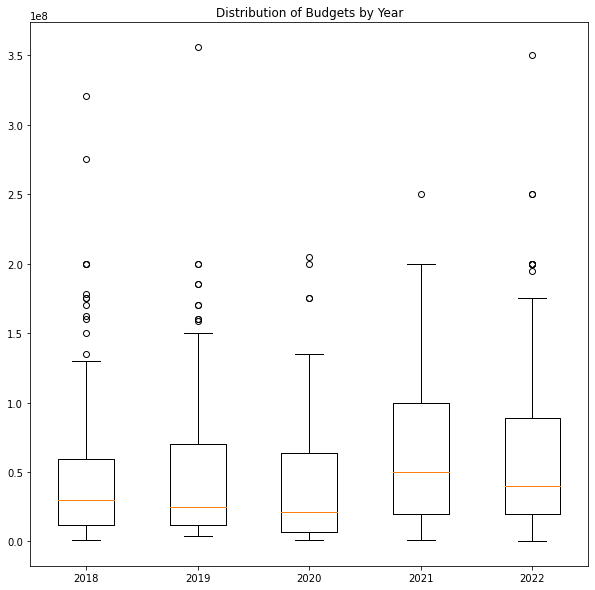

In [20]:
years = box_office["Year"].unique()

for_boxplots = [box_office.loc[box_office["Year"]==year,"Budget"] for year in years]

plt.figure(figsize=(10,10))
plt.boxplot(for_boxplots, labels=years)
plt.title("Distribution of Budgets by Year")

plt.show()

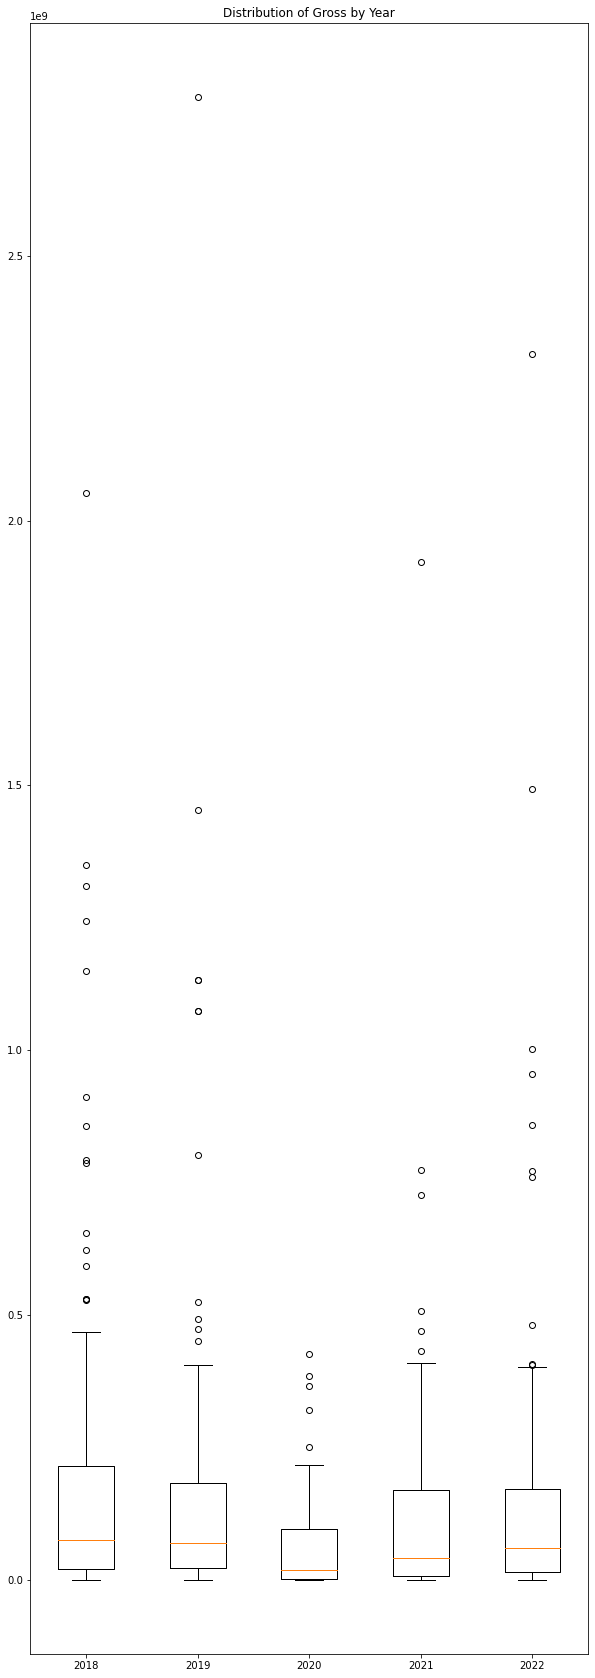

In [21]:
years = box_office["Year"].unique()

for_boxplots = [box_office.loc[box_office["Year"]==year,"Gross"] for year in years]

plt.figure(figsize=(10,30))
plt.boxplot(for_boxplots, labels=years)
plt.title("Distribution of Gross by Year")

plt.show()

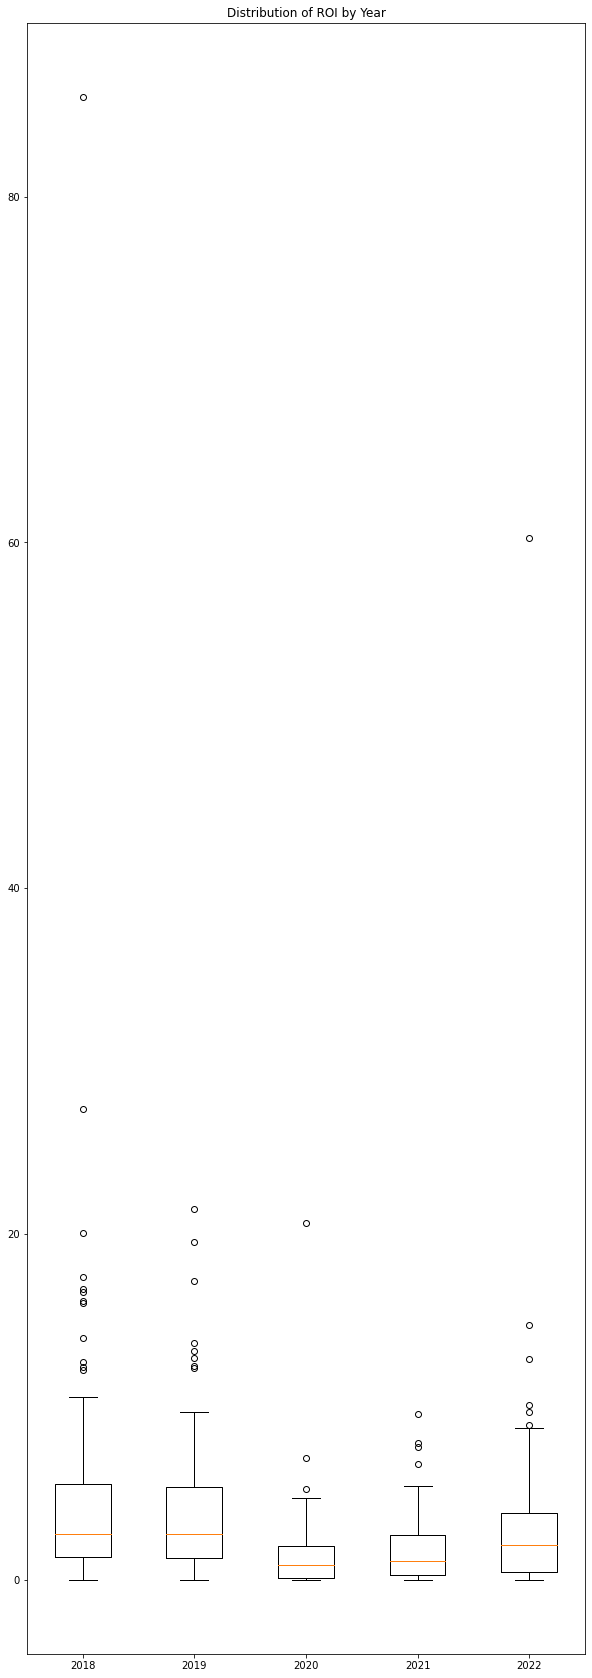

In [22]:
years = box_office["Year"].unique()

for_boxplots = [box_office.loc[box_office["Year"]==year,"ROI"] for year in years]

plt.figure(figsize=(10,30))
plt.boxplot(for_boxplots, labels=years)
plt.title("Distribution of ROI by Year")

plt.show()

In [23]:
box_office.loc[box_office["ROI"]>30]

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform,CurrencyBudget,CurrencyGross,Language,ROI,Profit,Year
143,Searching,Movie,2018-08-31,6120.0,Drama,NaN,71.0,7.6,170139,tt7668870,880000.0,75462037.0,others,USD,USD,English,85.752315,74582037.0,2018
1079,Terrifier 2,Movie,2022-10-06,8280.0,Horror,NaN,59.0,6.2,32431,tt10403420,250000.0,15065239.0,others,USD,USD,English,60.260956,14815239.0,2022


# Null Hypothesis 2: Budget has no effect on imdbRating for Netflix movies

In [24]:
#Netflix definition
netflix = clean_df.loc[(clean_df["imdbRating"].notnull())&
                       (clean_df["Platform"]=="netflix")&
                       (clean_df["CurrencyBudget"]=="USD")]
len(netflix)

35

### What is the strength of the relationship between Budget and imdbRating for Netflix movies

The coefficient of determination is: 0.04257349421496146
The correlation is: 0.21


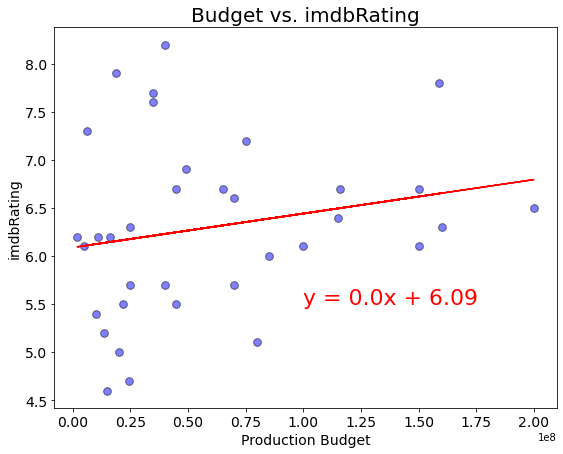

In [25]:
a = netflix["Budget"]
b = netflix["imdbRating"]
c = "Production Budget"
d = "imdbRating"
e = "Budget vs. imdbRating"
f = 1e8
g = 5.5
sp(a,b,c,d,e,f,g)

In [26]:
clean_df["Platform"].value_counts()

others     929
netflix    151
amazon      32
hulu        24
disney      17
Name: Platform, dtype: int64

### What is the average Net Profit per genre?

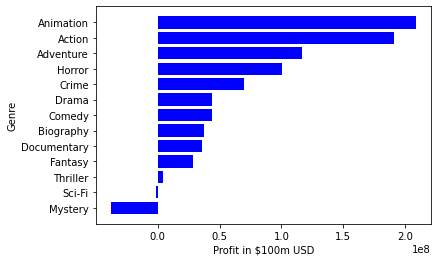

In [27]:
genre_roi = box_office.groupby("Genre")["Profit"].mean()
genre_roi.sort_values(ascending=True,inplace=True)
plt.barh(genre_roi.index,genre_roi,color="blue")
plt.xlabel("Profit in $100m USD")
plt.ylabel("Genre")
plt.show()

### What is the average Return on Investment per genre?

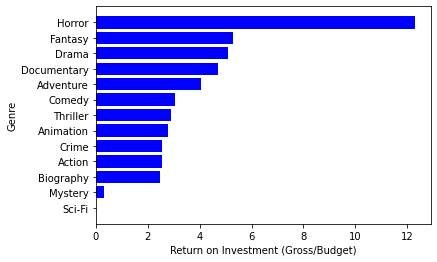

In [29]:
genre_roi = box_office.groupby("Genre")["ROI"].mean()
genre_roi.sort_values(ascending=True,inplace=True)
plt.barh(genre_roi.index,genre_roi,color="blue")
plt.xlabel("Return on Investment (Gross/Budget)")
plt.ylabel("Genre")
plt.show()

In [30]:
netflix = clean_df.loc[(clean_df["Platform"]=="netflix")&
                       (clean_df["Budget"].notnull())]
not_netflix = clean_df.loc[(clean_df["Platform"]=="others")&
                           (clean_df["Budget"].notnull())]
print(netflix["Budget"].mean())
print(not_netflix["Budget"].mean())

59931428.571428575
54198182.22246696
